# Cracking Iris Data

## 0. Preprocessing Data

In [65]:
str(iris)

'data.frame':	150 obs. of  6 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ dv          : logi  TRUE FALSE FALSE TRUE TRUE TRUE ...


In [66]:
iris$dv = FALSE

In [67]:
iris[sort(sample(nrow(iris), nrow(iris[,])*.7, replace=FALSE)),'dv'] = TRUE

In [68]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,dv
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5,3.6,1.4,0.2,setosa,1
6,5.4,3.9,1.7,0.4,setosa,1


In [69]:
iris.train <- iris[iris$dv==TRUE,-6]

In [70]:
iris.test <- iris[iris$dv==FALSE,-6]

In [71]:
nrow(iris.train)
nrow(iris.test)

[1] 105

[1] 45

In [72]:
head(iris.test)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
10,4.9,3.1,1.5,0.1,setosa
11,5.4,3.7,1.5,0.2,setosa
12,4.8,3.4,1.6,0.2,setosa
17,5.4,3.9,1.3,0.4,setosa
18,5.1,3.5,1.4,0.3,setosa
20,5.1,3.8,1.5,0.3,setosa


## 1. Multinominal Regression Analysis

In [73]:
library(nnet)

In [80]:
regression.model <- multinom(Species~.,data=iris.train)

# weights:  18 (10 variable)
initial  value 115.354290 
iter  10 value 9.443548
iter  20 value 1.074585
iter  30 value 0.470079
iter  40 value 0.426800
iter  50 value 0.391743
iter  60 value 0.260032
iter  70 value 0.064266
iter  80 value 0.054315
iter  90 value 0.030840
iter 100 value 0.022628
final  value 0.022628 
stopped after 100 iterations


In [87]:
rg.predicted <- predict(regression.model,iris.test)

In [88]:
table(rg.predicted, iris.test$Species)

            
rg.predicted setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         0
  virginica       0          3        12

In [89]:
sum(rg.predicted == iris.test$Species)/nrow(iris.test)

[1] 0.9333333

## Decision Tree

In [90]:
library(rpart)

In [102]:
dt.model <- rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris.train, method = "class")

In [103]:
dt.predicted <- predict(dt.model,iris.test,type="class")

In [104]:
table(dt.predicted, iris.test$Species)

            
dt.predicted setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         16         1
  virginica       0          3        11

In [106]:
sum(dt.predicted == iris.test$Species)/nrow(iris.test)

[1] 0.9111111

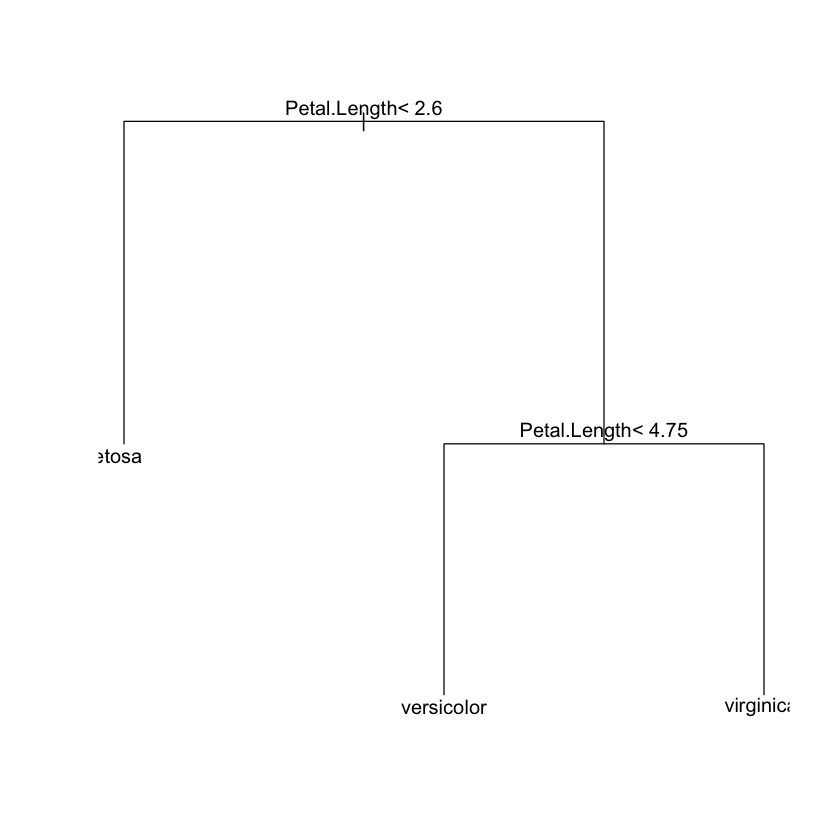

In [140]:
plot(dt.model)
text(dt.model)

## KNN

In [141]:
library(class)

In [149]:
iris.train.label <- iris.train$Species

In [151]:
head(iris.train.label)

[1] setosa setosa setosa setosa setosa setosa
Levels: setosa versicolor virginica

In [153]:
iris.knn.train <- iris.train[,-5]
iris.knn.test <- iris.test[,-5]

In [156]:
knn.predicted <- knn(train = iris.knn.train, test = iris.knn.test, cl = iris.train.label, k = 3)

In [157]:
table(iris.test$Species, knn.predicted)

            knn.predicted
             setosa versicolor virginica
  setosa         14          0         0
  versicolor      0         17         2
  virginica       0          1        11

In [158]:
sum(knn.predicted == iris.test$Species)/nrow(iris.test)

[1] 0.9333333

## Deep Learning

In [179]:
if(!require(h2o))install.packages("h2o", repos="http://cran.nexr.com/")
library(h2o)

Loading required package: h2o
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘h2o’”also installing the dependency ‘statmod’

Warning message in install.packages("h2o", repos = "http://cran.nexr.com/"):
“installation of package ‘statmod’ had non-zero exit status”Warning message in install.packages("h2o", repos = "http://cran.nexr.com/"):
“installation of package ‘h2o’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(h2o): there is no package called ‘h2o’


In [174]:
h2o.init(nthreads=-1, max_mem_size="2G")
h2o.removeAll() ## clean slate - just in case the cluster was already running

ERROR: Error in eval(expr, envir, enclos): 함수 "h2o.init"를 찾을 수 없습니다


In [7]:
install.packages("devtools", repos="http://cran.nexr.com/")

also installing the dependencies ‘whisker’, ‘rstudioapi’, ‘git2r’, ‘withr’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [10]:
library(httr)
set_config(config(ssl_verifypeer = 0L))

In [11]:
devtools::install_github("rstudio/tensorflow")

from URL https://api.github.com/repos/rstudio/tensorflow/zipball/master
Installing tensorflow
'/Users/shiny/anaconda/envs/gl-env/lib/R/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore --quiet CMD INSTALL  \
  '/private/var/folders/f0/nhbnqfdx7ts33j33511q4czc0000gn/T/RtmpVsZVNA/devtools339a44821e55/rstudio-tensorflow-f3f6496'  \
  --library='/Users/shiny/anaconda/envs/gl-env/lib/R/library' --install-tests 



ERROR: Error: Command failed (1)
